## Job Trend Analyzer - Julian Gutierrez

I built this project to explore real job market trends utilizing Python and real-time job data. Using [RemoteOK](https://RemoteOK.com), a job board containing largely remote roles in the tech industry. Utilizing their publically available API, I can pull job listings and break down what companies are hiring as well as what skills they're looking for. The main idea was to practice data collection, cleaning, and visualization but also to turn it into something useful in which I could help people see what tech skills are in demand right now.

The goal of this project is to **analyze hiring trends, track in-demand skills,** and **visualize which technologies are most in demand** in the tech job market.

# Project Objectives 🎯:

- Scrape live data using RemoteOK's public API

- Clean data as well as create structure using the Pandas library

- Identify and visualize the following:

    - In-demand skills **(Python, SQL, C++, etc.)**

    - Companies with the most hiring

    - Job posting trends over time

- Export results to .csv and .png files for later use in reports

# Libraries & Tools ⚙: 

- requests - To access RemoteOK's public API

- pandas - Data cleaning and manipulation

- matplotlib - Plotting insights

- collections - Needed for analyzing tag frequency

- jupyter notebook - documenting the process 

# Why I Did This 🏁:

As a student of the field and someone working towards a career in data science I wanted to tackle a project that:

- Uses **real-world, authentic, and messy data**

- Applying core tools in Python such as **Pandas, Requests, and Matplotlib**

- Shows that I can find insights that matter

# What You'll See in This Notebook 📓:

- A breakdown for the **current most in-demand skills** for tech jobs

- Charts that show which companies are hiring the most

- How job postings trends have changed over time

- A well organized notebook with all code and visualiations





## *Import Libraries* 🚚

In [34]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time

## *Data Scraping* 🧩

In [35]:
url = "https://remoteok.com/api"
headers = {
    "User-Agent" : "Mozilla/5.0",
    "Accept" : "application/json"
}

response = requests.get(url, headers = headers)

if response.status_code == 200:
    data = response.json()
    if len(data) > 1:
        job_data = data[1:]
        df = pd.DataFrame(job_data)
        print(f"Jobs found: {len(df)}")
        display(df[["date", "position", "company", "location", "tags"]].head(10))
        df.to_csv("data/remoteok_jobs.csv", index = False)
    else:
        print("No job data found.")
else:
    print("Failed to fetch data: ", response.status_code)

Jobs found: 94


,date,position,company,location,tags
0,2025-05-19T11:00:03+00:00,Member of Product Marketing Protocols,Anchorage Digital,United States,"[crypto, security, technical, support, copywri..."
1,2025-05-17T13:00:04+00:00,Manager Engineering II Data Pipelines,Ironclad,San Francisco,"[manager, design, hr, docker, technical, softw..."
2,2025-05-16T22:00:03+00:00,Visual Designer,PIP Labs,US,"[design, web3, designer, management, content, ..."
3,2025-05-16T11:00:10+00:00,Marketing Design Intern 2025 Summer Intern,Symmetry Systems,Remote,"[design, security, technical, support, softwar..."
4,2025-05-16T11:00:03+00:00,Lifecycle Marketing Associate,Blueland,Remote,"[support, growth, investment, strategy, manage..."
5,2025-05-16T10:00:03+00:00,Member of Product Trading,Anchorage Digital,United States,"[design, crypto, cryptocurrency, swift, securi..."
6,2025-05-16T00:00:06+00:00,Associate Attorney,EnableComp,,"[training, support, growth, financial, strateg..."
7,2025-05-15T18:00:01+00:00,,,,"[sales, non tech]"
8,2025-05-15T11:41:41+00:00,Member Support Unicorn,Interaction Design Foundation,,"[admin, customer support, social media]"
9,2025-05-15T10:00:03+00:00,Staff Frontend Engineer,Notabene,,"[frontend, design, crypto, cryptocurrency, sys..."


## *Data Exploration* 🔎

In [36]:
# Lets dig into the columns that exist within out new dataset.
df.columns.tolist()

['slug',
 'id',
 'epoch',
 'date',
 'company',
 'company_logo',
 'position',
 'tags',
 'logo',
 'description',
 'location',
 'salary_min',
 'salary_max',
 'apply_url',
 'url',
 'original',
 'verified']

In [37]:
# Hone in on some core data.
df[["position", "company", "location", "tags", "description", "date"]]

,position,company,location,tags,description,date
0,Member of Product Marketing Protocols,Anchorage Digital,United States,"[crypto, security, technical, support, copywri...","<p><span style=""font-size: 18px""><b>At Anchora...",2025-05-19T11:00:03+00:00
1,Manager Engineering II Data Pipelines,Ironclad,San Francisco,"[manager, design, hr, docker, technical, softw...","<p style=""min-height:1.5em"">Ironclad is the #1...",2025-05-17T13:00:04+00:00
2,Visual Designer,PIP Labs,US,"[design, web3, designer, management, content, ...","<p><span style=""font-size: 16px;"">PIP Labs is ...",2025-05-16T22:00:03+00:00
3,Marketing Design Intern 2025 Summer Intern,Symmetry Systems,Remote,"[design, security, technical, support, softwar...","<p><span style=""font-size: 32px;"">Overview</sp...",2025-05-16T11:00:10+00:00
4,Lifecycle Marketing Associate,Blueland,Remote,"[support, growth, investment, strategy, manage...","<p><br></p><p><span style=""font-size: 16px;"">B...",2025-05-16T11:00:03+00:00
...,...,...,...,...,...,...
89,Photo Editor,PlayOn,"Alpharetta, GA","[teach, students, support, travel, video, lead...","<p><span style=""font-size: 10.5pt;"">PlayOn is ...",2025-04-25T22:00:02+00:00
90,DevOps Engineer Staking,Crypto.com,,"[cryptocurrency, system, security, support, de...","<p>As DevOps engineer, you define and implemen...",2025-04-25T13:00:01+00:00
91,Business Operations Administrator,Anagram,Anywhere,"[support, accounting, payroll, finance, admini...",<p>Anagram is the ultimate insurance billing p...,2025-04-25T12:00:04+00:00
92,Project Coordinator,Lead Bank,Remote,"[design, embedded, training, technical, coordi...",<p>Lead is a fintech building banking infrastr...,2025-04-24T19:00:12+00:00


## *Data Cleaning* 🧹

In [38]:
# As an important part of data exploration, lets see what values are missing. 

print(df.isnull().sum())

slug             0
id               0
epoch            0
date             0
company          0
company_logo     0
position         0
tags             0
logo             0
description      0
location         0
salary_min       0
salary_max       0
apply_url        0
url              0
original        79
verified        85
dtype: int64


In [39]:
# Luckily enough, Nan vales only exist in the original and verified fields, both of which are not essential to the analysis we'll 
# be doing. Therefore lets make df where we drop them.

df_clean = df.drop(columns=["original", "verified"])
df_clean.to_csv("data/clean_remoteok_jobs.csv", index = False)

# No more missing values.

df_clean.isnull().sum()

slug            0
id              0
epoch           0
date            0
company         0
company_logo    0
position        0
tags            0
logo            0
description     0
location        0
salary_min      0
salary_max      0
apply_url       0
url             0
dtype: int64

## *Analysis and Visualizations* 🕵️‍♂️

In [40]:
# One trend that I believe could be critical to analyzing the current market, is the prevelance of which skills are in demand and to do this
# we can use counters

from collections import Counter

all_tags = sum(df_clean["tags"], [])
tag_counts = Counter(all_tags)

# Pulling top 10 most common tags in listings. 

top_tags = tag_counts.most_common(10)

print(f"The top 10 most common tags are: {top_tags}")

The top 10 most common tags are: [('support', 38), ('software', 33), ('management', 31), ('growth', 30), ('digital nomad', 30), ('design', 29), ('engineer', 28), ('technical', 27), ('marketing', 21), ('lead', 20)]


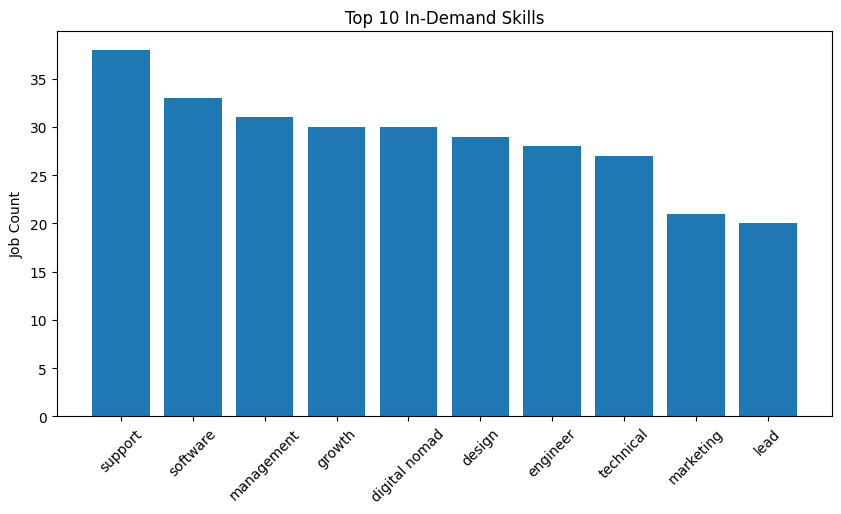

In [41]:
# Lets visualize these tags

import matplotlib.pyplot as plt

tags, counts = zip(*top_tags)
plt.figure(figsize = (10,5))
plt.bar(tags, counts)
plt.title("Top 10 In-Demand Skills")
plt.ylabel("Job Count")
plt.xticks(rotation = 45)
plt.show()

In [42]:
# Another strong point of analysis are which companies are in most need for employees,
# this could help in applying for positions. Let's explore this data 

top_companies = df_clean["company"].value_counts().head(10)

print(top_companies)

company
Contra                                7
Anchorage Digital                     5
Smallstep                             3
Firework                              2
Manta Network, Powered by p0x labs    2
Oowlish Technology                    2
Find                                  2
Tether Operations Limited             2
Lead Bank                             2
NextStep                              1
Name: count, dtype: int64


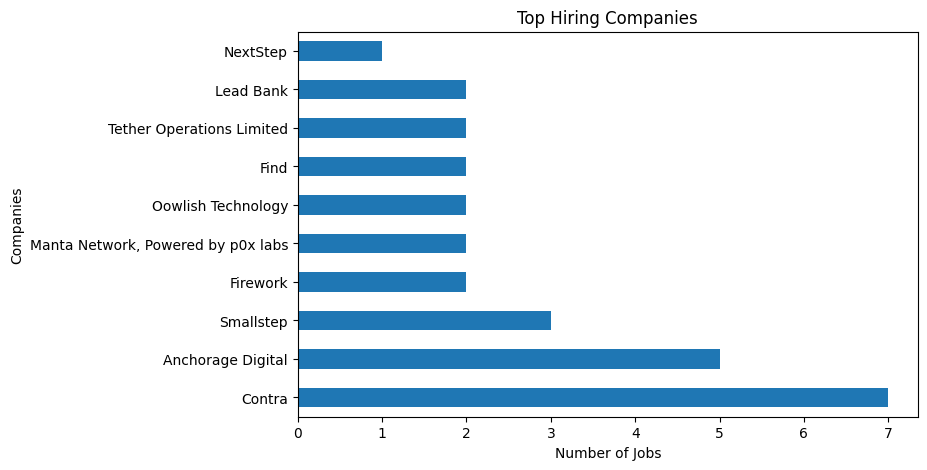

In [43]:
top_companies.plot(kind = "barh", figsize = (8,5), title = "Top Hiring Companies")
plt.ylabel("Companies")
plt.xlabel("Number of Jobs")
plt.show()

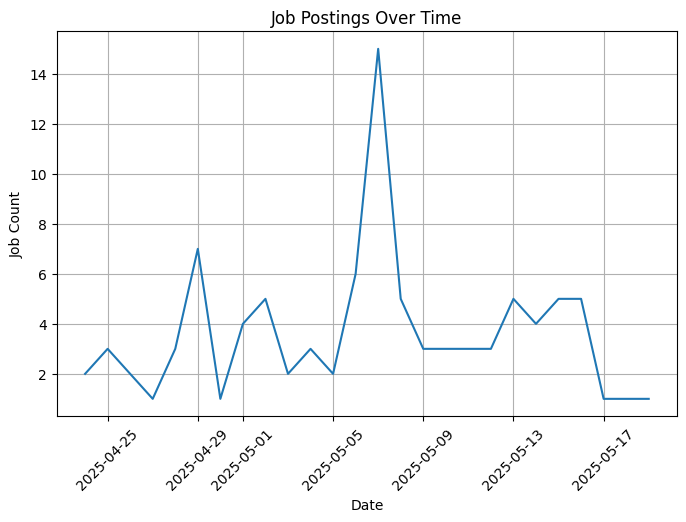

In [44]:
# Lastly another strong trend to analyze is how jobs have changed over time. 
# Lets start looking into this

# Convert the date column.
df_clean["date"] = pd.to_datetime(df_clean["date"])

jobs_by_date = df_clean.groupby(df_clean["date"].dt.date).size()

jobs_by_date.plot(figsize = (8,5), title = "Job Postings Over Time")
plt.xlabel("Date")
plt.ylabel("Job Count")
plt.xticks(rotation = 45)
plt.grid()
plt.show()

## Key Insights form the Data 💡:

Here's what I found after analyzing the job listings from [RemoteOK](https://remoteok.com):

---

### Most In-Demand Skills:

The top 5 skills in demand from remote tech jobs were:

- `support`

- `software`

- `management`

- `growth`

- `digital nomad`

These results suggest that employers currently are prioritizing soft-skills, technical abilities, and most of all flexability

![Top Skills](visuals/top_skills.png)

---

### Top Hiring Companies

The companies that are listing the most roles in this dataset were:

- `Contra`

- `Anchorage Digital`

- `Smallstep`

- `Find`

- `Lead Bank`

This shows us a strong present of startup companies in the remote tech hiring space

![Top Hiring Companoies](visuals/top_companies.png)

---

### Job Posting Trends Over Time

Job listings peaked sharply around **May 7, 2025**, suggesting that there was a hiring push by companies likely due to the beginning of the summer season. Other than this, there were consistent postings over the two week span that we analyzed.

![Job Postings Over Time](visuals/postings_over_time.png)

---

This data could help potential job weekers know **which skills to focus on** as well as **when to expect jobs to be posted**. Future improvements to this analysis could include analyzing other metrics provided such as **salary ranges** or **exploring other job boards**